In [1]:
import sys
print(sys.executable)

/home/sherry/anaconda3/envs/graph/bin/python


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
from nilearn import plotting
from openpyxl import load_workbook
import networkx as nx
import itertools
import gmatch4py as gm
from sklearn.cluster import SpectralClustering
import seaborn as sns
from MulticoreTSNE import MulticoreTSNE as TSNE
from scipy import stats
from sklearn import decomposition

/home/sherry/anaconda3/envs/graph/lib/python3.7/importlib/_bootstrap.py:219: UserWarning: To obtain optimal results install the Cython 'munkres' module at  https://github.com/jfrelinger/cython-munkres-wrapper
  return f(*args, **kwds)
unable to import 'smart_open.gcs', disabling that module


In [3]:
DATA_PATH = '/home/sherry/Dropbox/PhD/Data/PNC_Enriched/PNC_Connectomes_wSubcort'
LABEL_PATH = '/home/sherry/Dropbox/PhD/Data/PNC_Enriched/PNC_Connectomes_GO1_n968_LTN_dtiQApass_t1QApass_fsQApass.xlsx'
COG_PATH = '/home/sherry/Dropbox/PhD/Data/PNC_Enriched/PNC_Connectomes_n1601_cnb_factor_scores_tymoore_20151006.xlsx'
N_NODE = 118

In [4]:
workbook = load_workbook(LABEL_PATH)
sheet = workbook[workbook.sheetnames[0]]
data = sheet.values
cols = next(data)[0:]
data = list(data)
data = (itertools.islice(r, 0, None) for r in data)
df_label = pd.DataFrame(data, columns = cols)
df_label

/home/sherry/anaconda3/envs/graph/lib/python3.7/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


,Subject,bblid,scanid,ScanAgeYears,Sex
0,080199_002637,80199,2637,20.333,M
1,080812_002646,80812,2646,20.583,F
2,080607_002647,80607,2647,21.000,M
3,080854_002675,80854,2675,20.167,M
4,081826_002682,81826,2682,19.083,F
...,...,...,...,...,...
963,128913_008435,128913,8435,10.417,F
964,122895_008449,122895,8449,10.750,F
965,139469_008450,139469,8450,8.917,F
966,139272_008456,139272,8456,18.917,F


In [5]:
workbook = load_workbook(COG_PATH)
sheet = workbook[workbook.sheetnames[0]]
data = sheet.values
cols = next(data)[0:]
data = list(data)
data = (itertools.islice(r, 0, None) for r in data)
df_cog = pd.DataFrame(data, columns = cols)
df = df_label.merge(df_cog, on='Subject')
df

,Subject,bblid,scanid,ScanAgeYears,Sex,Overall_Efficiency,Overall_Accuracy,Overall_Speed,F1_Exec_Comp_Res_Accuracy,F2_Social_Cog_Accuracy,...,F1_Exec_Comp_Cog_Accuracy_Ar,F2_Social_Cog_Accuracy_Ar,F3_Memory_Accuracy_Ar,F1_Social_Cognition_Efficiency_Ar,F2_Complex_Reasoning_Efficiency_Ar,F3_Memory_Efficiency_Ar,F4_Executive_Efficiency_Ar,F1_Slow_Speed_Ar,F2_Memory_Speed_Ar,F3_Fast_Speed_Ar
0,080199_002637,80199,2637,20.333,M,0.772291,0.580977,0.880618,0.455189,1.375420,...,-0.262102,0.951817,-0.729813,1.309180,0.323467,-0.216490,-0.439120,0.882288,0.621913,-0.233789
1,080812_002646,80812,2646,20.583,F,1.301177,1.127330,1.013718,1.040810,1.330917,...,0.454563,0.892760,0.400804,1.000376,1.442359,0.554244,0.390312,0.891195,0.657851,0.582442
2,080607_002647,80607,2647,21.000,M,0.286403,-0.166606,0.867489,-0.589465,0.349593,...,-1.700007,-0.419078,-0.669416,0.161091,-1.107295,0.241034,-0.233995,0.862486,0.864056,-0.557817
3,080854_002675,80854,2675,20.167,M,1.214104,0.831975,0.784795,1.109957,0.792038,...,0.647779,0.287444,-1.371715,1.056468,1.638448,-1.279257,0.728730,1.249609,-0.136509,0.333181
4,081826_002682,81826,2682,19.083,F,0.658344,0.701067,0.797432,0.863827,0.188943,...,0.394165,-0.445431,0.387097,-0.140397,0.684000,1.078564,-0.618809,0.299570,1.109254,-0.971033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,128913_008435,128913,8435,10.417,F,-0.712246,-0.569068,-0.438520,-0.261823,-1.658564,...,1.064047,-0.808203,0.442814,-0.138470,0.957842,0.277516,1.245037,0.777936,0.409998,-0.068248
964,122895_008449,122895,8449,10.750,F,-0.882092,-0.668601,-0.584834,-0.636302,-0.554835,...,0.642309,0.629783,-0.335251,0.720055,0.988265,-0.562909,0.727081,0.874502,0.187113,-0.403543
965,139469_008450,139469,8450,8.917,F,-1.526000,-1.071063,-1.241007,-0.860672,-1.952560,...,0.321335,-1.138056,0.633449,-1.163060,-0.661444,0.357749,0.585915,-0.747036,-0.224689,0.334851
966,139272_008456,139272,8456,18.917,F,0.112258,-0.254239,0.331829,-0.357341,-0.711575,...,-1.065160,-1.436878,0.149712,-0.329351,-0.136353,0.178420,-1.404730,0.668937,-0.024057,-1.707187


In [6]:
#subj_list = [x for x in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, x))]
subj_list = np.loadtxt(os.path.join(DATA_PATH, 'IntersectionList.txt'), dtype=str)
#print(subj_list)
filelist = os.listdir(os.path.join(DATA_PATH, subj_list[0]))
filelist.sort()
df = df.set_index('Subject')
df = df.loc[subj_list]
df = df.reset_index()
df

,Subject,bblid,scanid,ScanAgeYears,Sex,Overall_Efficiency,Overall_Accuracy,Overall_Speed,F1_Exec_Comp_Res_Accuracy,F2_Social_Cog_Accuracy,...,F1_Exec_Comp_Cog_Accuracy_Ar,F2_Social_Cog_Accuracy_Ar,F3_Memory_Accuracy_Ar,F1_Social_Cognition_Efficiency_Ar,F2_Complex_Reasoning_Efficiency_Ar,F3_Memory_Efficiency_Ar,F4_Executive_Efficiency_Ar,F1_Slow_Speed_Ar,F2_Memory_Speed_Ar,F3_Fast_Speed_Ar
0,104848_004021,104848,4021,9.333,M,-2.653646,-0.553921,-3.910421,-0.171667,-1.576187,...,1.009712,-0.767816,-0.264849,-1.874661,0.446218,-2.681734,-2.289818,-1.862693,-3.199088,-4.179434
1,096118_003500,96118,3500,12.750,F,-0.715471,-0.335380,-0.771795,-0.837502,0.003914,...,-0.978209,0.137709,1.291961,-1.146359,-2.098182,1.372819,-0.711722,-1.877799,0.098023,-0.921030
2,089786_003374,89786,3374,15.000,F,0.545471,0.103866,0.625997,0.101847,0.450649,...,-0.172187,0.197136,-0.438456,0.652406,-0.017963,-0.115064,-0.179959,0.541660,0.290331,-0.355258
3,084002_008415,84002,8415,22.250,M,1.173255,1.256074,0.485205,1.149940,1.419740,...,0.614987,1.004484,0.485705,0.654913,0.470248,0.168938,0.968130,0.008785,0.045640,0.812169
4,118513_005409,118513,5409,17.917,M,1.524771,1.676928,0.900182,1.423086,2.210197,...,0.988091,2.034596,0.171513,1.686030,0.868904,-0.236525,1.280882,0.436948,0.278124,0.923202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,127104_006609,127104,6609,18.583,F,0.761541,1.408620,0.015364,1.134530,1.598740,...,0.648972,1.266752,0.590299,1.045653,0.074405,-0.020112,-0.149322,0.064060,-0.254299,-1.149920
815,118807_008351,118807,8351,14.083,M,0.236954,0.018397,0.136934,0.179985,-0.822101,...,0.443958,-0.779257,0.181545,-0.127086,0.470268,-0.372238,1.057783,0.396101,-0.299761,0.499119
816,090050_004746,90050,4746,16.500,M,0.034860,0.263985,-0.129999,0.059641,0.844325,...,-0.424307,0.579625,-0.590891,-0.094879,-0.791280,-0.313816,-0.488425,-0.872872,0.020465,-0.497376
817,088412_004410,88412,4410,15.167,F,-0.070488,-0.496581,0.467241,-0.563000,-0.506371,...,-1.070067,-1.093180,-0.688801,-1.208924,-1.145344,0.254091,0.443247,-0.265995,0.652783,0.165584


In [7]:
if N_NODE is not None:
    filelist = [x for x in filelist if str(N_NODE) in x.split('_')]
print(filelist)
conn_dict = {}
for subj in subj_list:
    sconn = []
    fconn = []
    for file in filelist:
        filepath = os.path.join(DATA_PATH, subj, file)
        if file.startswith('Probabilistic'):
            sconn.append(np.loadtxt(filepath))
        elif file.startswith('Restbold'):
            fconn.append(np.loadtxt(filepath))
        else:
            print('Not recognized')
    fconn = ConnectivityMeasure(kind='correlation').fit_transform(fconn)
    conn_dict[subj] = {'sconn': sconn, 'fconn': fconn}

['Probabilistic_det_10M_nonnormalized_118_sift2.txt', 'Probabilistic_det_10M_nonnormalized_118_sift2_nodevol.txt', 'Probabilistic_prob_10M_nonnormalized_118_sift2.txt', 'Probabilistic_prob_10M_nonnormalized_118_sift2_nodevol.txt', 'Restbold_118_full.txt']


In [8]:
conn_dict['104848_004021']['fconn']

array([[[ 1.        ,  0.27510451,  0.18235615, ..., -0.11883097,
         -0.6078877 , -0.8100962 ],
        [ 0.27510451,  1.        ,  0.75324131, ...,  0.48113601,
         -0.12420858, -0.40817726],
        [ 0.18235615,  0.75324131,  1.        , ...,  0.68321079,
          0.12741661, -0.38520752],
        ...,
        [-0.11883097,  0.48113601,  0.68321079, ...,  1.        ,
          0.44457212, -0.0985002 ],
        [-0.6078877 , -0.12420858,  0.12741661, ...,  0.44457212,
          1.        ,  0.58008003],
        [-0.8100962 , -0.40817726, -0.38520752, ..., -0.0985002 ,
          0.58008003,  1.        ]]])

In [14]:
male_list = list(np.random.choice(df[df['Sex'] == 'M']['Subject'].tolist(), size=50, replace=False))
female_list = list(np.random.choice(df[df['Sex'] == 'F']['Subject'].tolist(), size=50, replace=False))
subj_list_rand = male_list+female_list
df_rand = df.set_index('Subject')
df_rand = df_rand.loc[subj_list_rand]
df_rand.reset_index()
df_rand

,bblid,scanid,ScanAgeYears,Sex,Overall_Efficiency,Overall_Accuracy,Overall_Speed,F1_Exec_Comp_Res_Accuracy,F2_Social_Cog_Accuracy,F3_Memory_Accuracy,...,F1_Exec_Comp_Cog_Accuracy_Ar,F2_Social_Cog_Accuracy_Ar,F3_Memory_Accuracy_Ar,F1_Social_Cognition_Efficiency_Ar,F2_Complex_Reasoning_Efficiency_Ar,F3_Memory_Efficiency_Ar,F4_Executive_Efficiency_Ar,F1_Slow_Speed_Ar,F2_Memory_Speed_Ar,F3_Fast_Speed_Ar
Subject,,,,,,,,,,,,,,,,,,,,,
083207_003138,83207,3138,19.250,M,1.104457,0.745424,1.085804,0.367619,1.117956,0.994353,...,-0.315494,0.669095,0.832523,0.875888,0.205074,1.013694,0.331182,0.775591,0.646842,0.476877
083999_002954,83999,2954,18.667,M,1.157131,1.745087,0.250261,2.191692,0.599223,1.607966,...,2.108738,0.065603,1.239975,0.334822,1.234571,0.189463,0.852997,-0.172296,-0.559649,0.905147
130411_006068,130411,6068,8.167,M,-3.164257,-3.058488,-2.257949,-2.904650,-2.344185,-2.394491,...,-1.880707,-1.458470,-1.172209,-0.996850,-0.801675,-1.731355,-2.247916,0.944502,-2.115600,-1.212515
091460_003432,91460,3432,18.000,M,0.405725,0.711886,0.088017,0.557362,0.657987,0.588771,...,0.052052,0.184268,0.210657,-0.073962,0.708036,-0.046640,-1.034318,0.182486,-0.181944,-1.882952
120364_005605,120364,5605,15.833,M,0.539022,1.233355,0.086766,1.688529,0.149606,0.512989,...,1.755755,-0.198165,0.010349,-0.011482,1.252959,0.103293,-0.867532,-0.220458,0.367123,-2.040491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
090783_004439,90783,4439,13.750,F,-0.413404,-1.056998,0.090610,-1.332992,-0.424789,-0.081078,...,-1.720952,-0.616570,-0.168978,-0.007615,-1.358045,0.197264,-1.424455,0.444408,-0.050224,-1.306521
112028_004546,112028,4546,14.833,F,1.305477,1.134903,0.851692,1.230091,0.494275,1.123442,...,1.257905,0.374476,0.804845,0.981838,1.729131,0.373937,0.775934,0.948578,0.160796,0.348847
093862_003682,93862,3682,12.917,F,-0.440278,-0.585296,-0.263372,-0.322439,-1.812585,0.214466,...,-0.264068,-2.098011,0.215599,-1.397890,-0.006322,0.072472,-0.254229,-0.396388,-0.270355,-0.189028


In [15]:
'''
def edge_subst_cost(e1, e2):
    return abs(e1['weight'] - e2['weight']) / (abs(e1['weight']) + abs(e2['weight']))


ged1 = np.zeros((len(subj_list), len(subj_list)))
for i in range(len(subj_list[0:1])):
    for j in range(i+1, len(subj_list[0:2])):
        G1 = nx.from_numpy_array(conn_dict[subj_list[i]]['sconn'][0])
        G2 = nx.from_numpy_array(conn_dict[subj_list[j]]['sconn'][0])
        for v in nx.optimize_graph_edit_distance(G1, G2, node_match=None, edge_match=None,
                                           node_subst_cost=None, node_del_cost=None, node_ins_cost=None,
                                           edge_subst_cost=, edge_del_cost=None, edge_ins_cost=None,
                                           upper_bound=None):
            ged1[i,j] = v
'''

# graph edit distance for structural connectivity
# node deletion & addition cost is 1, node substisution cost is 0 (node attributes are not considered)
# edge deletion & addition cost is 1

print('Create graphs...')
Glist = []
for subj in subj_list_rand:
    Glist.append(nx.from_numpy_array(conn_dict[subj]['sconn'][0]))

print('Compute edit distance...')
ged_fun = gm.GraphEditDistance(1,1,1,1)
ged_sex = ged_fun.compare(Glist,None)
ged_sex_sim = ged_fun.similarity(ged_sex)

Create graphs...
Compute edit distance...


In [16]:
print(ged_sex_sim)
np.savetxt('graph_distance_sex.txt', ged_sex_sim)

[[1.         0.03389831 0.01694915 ... 0.05084746 0.05084746 0.01694915]
 [0.03389831 1.         0.05932203 ... 0.00847458 0.05932203 0.00847458]
 [0.01694915 0.05932203 1.         ... 0.00847458 0.02542373 0.00847458]
 ...
 [0.05084746 0.00847458 0.00847458 ... 1.         0.03389831 0.02542373]
 [0.05084746 0.05932203 0.02542373 ... 0.03389831 1.         0.00847458]
 [0.01694915 0.00847458 0.00847458 ... 0.02542373 0.00847458 1.        ]]


In [13]:
#ged_sex_sim = np.loadtxt('graph_distance.txt')

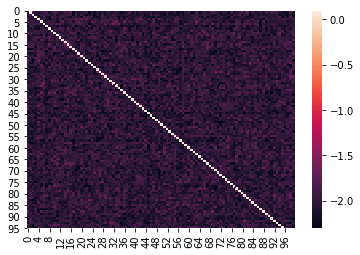

In [17]:
sns.heatmap(np.log(ged_sex_sim+0.1))

In [18]:
clustering = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0).fit(ged_sex_sim)
print(clustering.labels_)

[0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0]


/home/sherry/anaconda3/envs/graph/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [19]:
pca = decomposition.PCA(n_components=2).fit(ged_sex_sim)
embeddings_pca = pca.transform(ged_sex_sim)
print(embeddings_pca.shape)

(100, 2)


In [20]:
embeddings = TSNE(n_components=2, n_jobs=8).fit_transform(ged_sex)
print(embeddings.shape)

(100, 2)


In [26]:
ged_label = pd.DataFrame({'Subject': subj_list_rand,
                          'GEDLabel': clustering.labels_,
                          'TSNE1': list(embeddings[:, 0]),
                          'TSNE2': list(embeddings[:, 1]),
                          'PCA1': list(embeddings_pca[:, 0]),
                          'PCA2': list(embeddings_pca[:, 1])})
df_ged = df.merge(ged_label, on='Subject')
df_ged['Sex'] = 1*(df_ged['Sex'] == 'F')
df_ged

,Subject,bblid,scanid,ScanAgeYears,Sex,Overall_Efficiency,Overall_Accuracy,Overall_Speed,F1_Exec_Comp_Res_Accuracy,F2_Social_Cog_Accuracy,...,F3_Memory_Efficiency_Ar,F4_Executive_Efficiency_Ar,F1_Slow_Speed_Ar,F2_Memory_Speed_Ar,F3_Fast_Speed_Ar,GEDLabel,TSNE1,TSNE2,PCA1,PCA2
0,122438_006387,122438,6387,17.000,1,0.104733,0.516064,-0.367795,0.409626,0.390511,...,-1.272643,0.795988,-0.955934,-0.912481,0.412650,1,0.389943,-3.519679,0.072419,0.132998
1,089186_004550,89186,4550,12.500,0,0.045609,0.102784,0.225048,0.055892,0.503252,...,0.095913,-0.485868,0.245747,0.286953,-0.140036,0,-0.163839,3.435539,-0.234254,0.076818
2,131552_006200,131552,6200,12.417,1,0.436899,-0.041107,0.633690,0.188915,0.209795,...,0.084878,0.471441,-0.178080,0.530461,1.799748,1,0.973409,0.365032,0.087606,-0.050342
3,093406_004795,93406,4795,18.250,1,0.955036,0.252084,1.312420,0.107922,0.931694,...,0.163796,-0.641947,1.511751,0.566436,0.077738,1,3.016205,-0.918935,0.112816,0.033026
4,127128_005545,127128,5545,16.583,0,0.195031,0.141732,0.136137,0.174385,0.455928,...,-0.034280,-0.142640,-0.589238,0.004054,0.478013,1,-0.302611,-0.845570,0.040441,0.168596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,096902_005150,96902,5150,10.417,1,-0.045763,-0.021633,-0.297684,-0.229511,-0.073662,...,0.204850,1.250027,0.288015,-0.177631,0.885300,1,0.234609,0.205751,0.103504,-0.051209
96,093867_004371,93867,4371,13.333,1,-0.011364,0.011905,-0.037925,-0.008681,-0.108241,...,0.744796,-0.720246,-0.220511,0.077325,-0.762127,1,-1.199302,2.234757,0.063949,-0.229144
97,130861_006024,130861,6024,11.917,1,0.114408,-0.267221,0.564174,-0.579258,-0.208765,...,1.365058,-0.694173,1.047683,0.964071,-1.710319,0,1.434745,1.192220,-0.018714,-0.026716
98,091145_003897,91145,3897,17.833,1,0.500323,0.032461,0.818654,-0.010379,1.014024,...,-0.387814,-0.269451,0.439631,0.609337,0.073339,1,2.995607,-0.415845,0.158883,0.009772


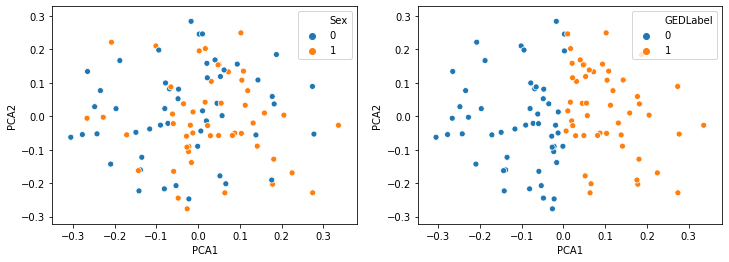

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.scatterplot(x='PCA1', y='PCA2', data=df_ged, hue=df_ged['Sex'])
plt.subplot(1,2,2)
sns.scatterplot(x='PCA1', y='PCA2', data=df_ged, hue=df_ged['GEDLabel'])

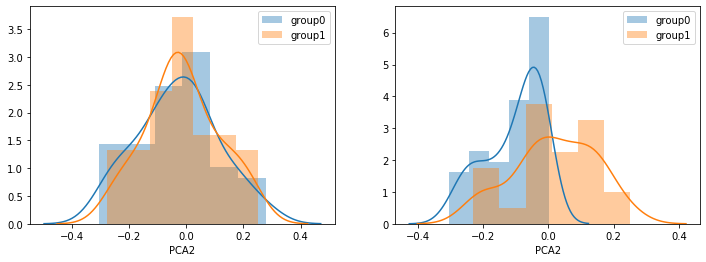

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.distplot(df_ged[df_ged['Sex'] == 0]['PCA1'], kde=True, label='group0')
sns.distplot(df_ged[df_ged['Sex'] == 1]['PCA2'], kde=True, label='group1')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(df_ged[df_ged['GEDLabel'] == 0]['PCA1'], kde=True, label='group0')
sns.distplot(df_ged[df_ged['GEDLabel'] == 1]['PCA2'], kde=True, label='group1')
plt.legend()

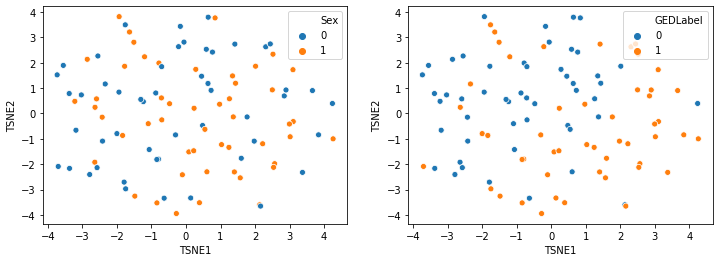

In [29]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.scatterplot(x='TSNE1', y='TSNE2', data=df_ged, hue=df_ged['Sex'])
plt.subplot(1,2,2)
sns.scatterplot(x='TSNE1', y='TSNE2', data=df_ged, hue=df_ged['GEDLabel'])

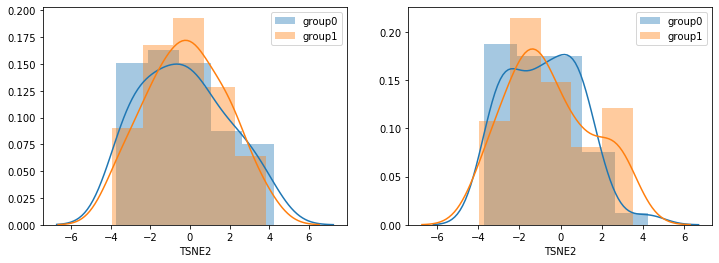

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.distplot(df_ged[df_ged['Sex'] == 0]['TSNE1'], kde=True, label='group0')
sns.distplot(df_ged[df_ged['Sex'] == 1]['TSNE2'], kde=True, label='group1')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(df_ged[df_ged['GEDLabel'] == 0]['TSNE1'], kde=True, label='group0')
sns.distplot(df_ged[df_ged['GEDLabel'] == 1]['TSNE2'], kde=True, label='group1')
plt.legend()

In [31]:
accuracy = (df_ged['GEDLabel'] == df_ged['Sex']).sum()/len(df_ged)
print(accuracy)

0.56


-------------------------Mean-------------------------
GEDLabel
0    15.82000
1    15.59666
Name: ScanAgeYears, dtype: float64
-------------------------Std-------------------------
GEDLabel
0    2.883617
1    3.197821
Name: ScanAgeYears, dtype: float64
Ttest_indResult(statistic=-0.3667594685947348, pvalue=0.7145975286704027)


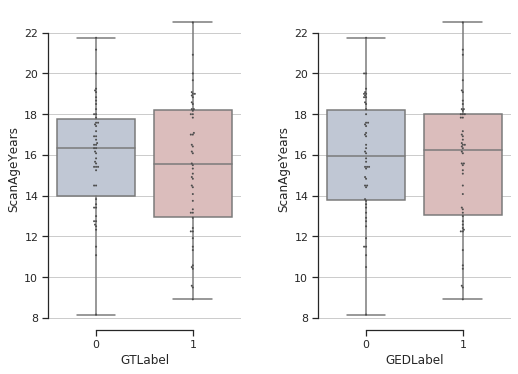

In [36]:
print('-------------------------Mean-------------------------')
print(df_ged.groupby('GEDLabel')['ScanAgeYears'].mean())
print('-------------------------Std-------------------------')
print(df_ged.groupby('GEDLabel')['ScanAgeYears'].std())
SA_g1 = df_ged[df_ged['GEDLabel'] == 1]['ScanAgeYears'].dropna()
SA_g0 = df_ged[df_ged['GEDLabel'] == 0]['ScanAgeYears'].dropna()
print(stats.ttest_ind(SA_g1, SA_g0, equal_var=False))

sns.set(style='ticks')
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
sns.boxplot(x='Sex', y='ScanAgeYears', data=df_ged, whis='range', palette='vlag', ax=ax[0])
sns.swarmplot(x='Sex', y='ScanAgeYears', data=df_ged, size=2, color='.3', linewidth=0, ax=ax[0])
#ax[0].stripplot(x='GEDLabel', y='ScanAgeYears', data=df_ged, size=5, jitter = 0.1)
ax[0].yaxis.grid(True)
ax[0].set(xlabel='GTLabel')

sns.boxplot(x='GEDLabel', y='ScanAgeYears', data=df_ged, whis='range', palette='vlag', ax=ax[1])
sns.swarmplot(x='GEDLabel', y='ScanAgeYears', data=df_ged, size=2, color='.3', linewidth=0, ax=ax[1])
#ax[1] = sns.stripplot(x='GEDLabel', y='ScanAgeYears', data=df_ged, size=5, jitter = 0.1)
ax[1].yaxis.grid(True)
ax[1].set(xlabel='GEDLabel')
sns.despine(trim=True)
plt.tight_layout(pad=3.0)

-------------------------Mean-------------------------
GEDLabel
0    0.408806
1    0.217155
Name: Overall_Accuracy, dtype: float64
-------------------------Std-------------------------
GEDLabel
0    0.893535
1    0.755331
Name: Overall_Accuracy, dtype: float64
Ttest_indResult(statistic=-1.1533675250879165, pvalue=0.2516541839660801)


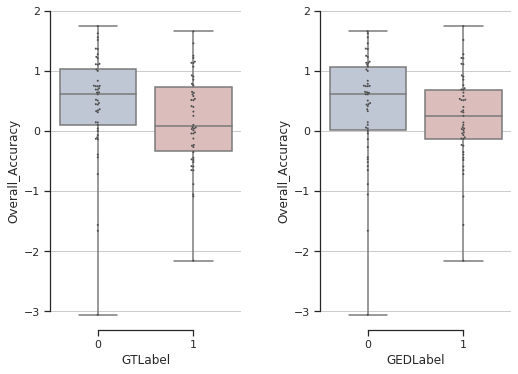

In [35]:
print('-------------------------Mean-------------------------')
print(df_ged.groupby('GEDLabel')['Overall_Accuracy'].mean())
print('-------------------------Std-------------------------')
print(df_ged.groupby('GEDLabel')['Overall_Accuracy'].std())
OA_g1 = df_ged[df_ged['GEDLabel'] == 1]['Overall_Accuracy'].dropna()
OA_g0 = df_ged[df_ged['GEDLabel'] == 0]['Overall_Accuracy'].dropna()
print(stats.ttest_ind(OA_g1, OA_g0, equal_var=False))

sns.set(style='ticks')
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
sns.boxplot(x='Sex', y='Overall_Accuracy', data=df_ged, whis='range', palette='vlag', ax=ax[0])
sns.swarmplot(x='Sex', y='Overall_Accuracy', data=df_ged, size=2, color='.3', linewidth=0, ax=ax[0])
#ax[0].stripplot(x='GEDLabel', y='Overall_Accuracy', data=df_ged, size=5, jitter = 0.1)
ax[0].yaxis.grid(True)
ax[0].set(xlabel='GTLabel')

sns.boxplot(x='GEDLabel', y='Overall_Accuracy', data=df_ged, whis='range', palette='vlag', ax=ax[1])
sns.swarmplot(x='GEDLabel', y='Overall_Accuracy', data=df_ged, size=2, color='.3', linewidth=0, ax=ax[1])
#ax[1] = sns.stripplot(x='GEDLabel', y='Overall_Accuracy', data=df_ged, size=5, jitter = 0.1)
ax[1].yaxis.grid(True)
ax[1].set(xlabel='GEDLabel')
sns.despine(trim=True)
plt.tight_layout(pad=3.0)

-------------------------Mean-------------------------
GEDLabel
0    0.481446
1    0.154533
Name: Overall_Efficiency, dtype: float64
-------------------------Std-------------------------
GEDLabel
0    0.764903
1    0.814207
Name: Overall_Efficiency, dtype: float64
Ttest_indResult(statistic=-2.0581053049026585, pvalue=0.04228046525608287)


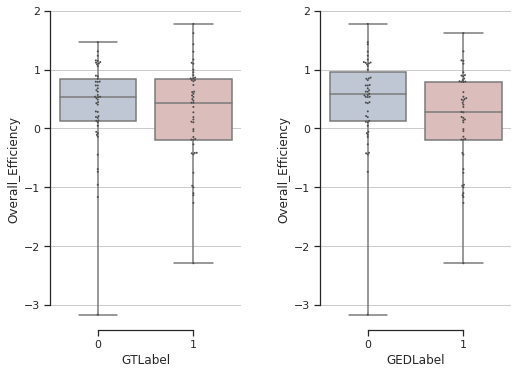

In [39]:
print('-------------------------Mean-------------------------')
print(df_ged.groupby('GEDLabel')['Overall_Efficiency'].mean())
print('-------------------------Std-------------------------')
print(df_ged.groupby('GEDLabel')['Overall_Efficiency'].std())
OE_g1 = df_ged[df_ged['GEDLabel'] == 1]['Overall_Efficiency'].dropna()
OE_g0 = df_ged[df_ged['GEDLabel'] == 0]['Overall_Efficiency'].dropna()
print(stats.ttest_ind(OE_g1, OE_g0, equal_var=False))

sns.set(style='ticks')
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
sns.boxplot(x='Sex', y='Overall_Efficiency', data=df_ged, whis='range', palette='vlag', ax=ax[0])
sns.swarmplot(x='Sex', y='Overall_Efficiency', data=df_ged, size=2, color='.3', linewidth=0, ax=ax[0])
#ax[0].stripplot(x='GEDLabel', y='Overall_Efficiency', data=df_ged, size=5, jitter = 0.1)
ax[0].yaxis.grid(True)
ax[0].set(xlabel='GTLabel')

sns.boxplot(x='GEDLabel', y='Overall_Efficiency', data=df_ged, whis='range', palette='vlag', ax=ax[1])
sns.swarmplot(x='GEDLabel', y='Overall_Efficiency', data=df_ged, size=2, color='.3', linewidth=0, ax=ax[1])
#ax[1] = sns.stripplot(x='GEDLabel', y='Overall_Efficiency', data=df_ged, size=5, jitter = 0.1)
ax[1].yaxis.grid(True)
ax[1].set(xlabel='GEDLabel')
sns.despine(trim=True)
plt.tight_layout(pad=3.0)

In [40]:
columns = ['ScanAgeYears', 'Overall_Efficiency', 'Overall_Accuracy', 'Overall_Speed']
df_test = {'column':[], 't-test_stats':[], 't-test_p':[], 'welch_stats':[], 'welch_p':[], 'mannwhitneyu_stats':[], 'mannwhitneyu_p':[]}
for column in columns:
    df_test['column'].append(column)
    g0 = df_ged[df_ged['GEDLabel'] == 0][column].dropna()
    g1 = df_ged[df_ged['GEDLabel'] == 1][column].dropna()

    statistics, p = stats.ttest_ind(g1, g0)
    df_test['t-test_stats'].append(statistics)
    df_test['t-test_p'].append(p)
    
    statistics, p = stats.ttest_ind(g1, g0, equal_var=False)
    df_test['welch_stats'].append(statistics)
    df_test['welch_p'].append(p)

    statistics, p = stats.mannwhitneyu(g1, g0)
    df_test['mannwhitneyu_stats'].append(statistics)
    df_test['mannwhitneyu_p'].append(p)

pd.DataFrame(df_test).set_index('column')

,t-test_stats,t-test_p,welch_stats,welch_p,mannwhitneyu_stats,mannwhitneyu_p
column,,,,,,
ScanAgeYears,-0.366759,0.714589,-0.366759,0.714598,1196.5,0.357399
Overall_Efficiency,-2.059416,0.042134,-2.058105,0.042280,916.0,0.015423
Overall_Accuracy,-1.151410,0.252394,-1.153368,0.251654,986.5,0.047891
Overall_Speed,-2.157352,0.033448,-2.152278,0.034014,962.0,0.033096


In [41]:
columns = ['ScanAgeYears', 'Overall_Efficiency', 'Overall_Accuracy', 'Overall_Speed']
df_test = {'column':[], 't-test_stats':[], 't-test_p':[], 'welch_stats':[], 'welch_p':[], 'mannwhitneyu_stats':[], 'mannwhitneyu_p':[]}
for column in columns:
    df_test['column'].append(column)
    g0 = df_ged[df_ged['Sex'] == 0][column].dropna()
    g1 = df_ged[df_ged['Sex'] == 1][column].dropna()

    statistics, p = stats.ttest_ind(g1, g0)
    df_test['t-test_stats'].append(statistics)
    df_test['t-test_p'].append(p)
    
    statistics, p = stats.ttest_ind(g1, g0, equal_var=False)
    df_test['welch_stats'].append(statistics)
    df_test['welch_p'].append(p)

    statistics, p = stats.mannwhitneyu(g1, g0)
    df_test['mannwhitneyu_stats'].append(statistics)
    df_test['mannwhitneyu_p'].append(p)

pd.DataFrame(df_test).set_index('column')

,t-test_stats,t-test_p,welch_stats,welch_p,mannwhitneyu_stats,mannwhitneyu_p
column,,,,,,
ScanAgeYears,-0.917411,0.361180,-0.917411,0.361269,1137.5,0.219995
Overall_Efficiency,-0.774573,0.440476,-0.774939,0.440262,1090.0,0.173275
Overall_Accuracy,-1.604093,0.111945,-1.601667,0.112573,920.0,0.016542
Overall_Speed,-0.121892,0.903236,-0.122252,0.902971,1203.0,0.440197


In [47]:
columns = ['ScanAgeYears', 'Overall_Efficiency', 'Overall_Accuracy', 'Overall_Speed']
df_test = {'column':[], 't-test_stats':[], 't-test_p':[], 'welch_stats':[], 'welch_p':[], 'mannwhitneyu_stats':[], 'mannwhitneyu_p':[]}
for column in columns:
    df_test['column'].append(column)
    g0 = df_ged[df_ged['Sex'] == 0][column].dropna()
    g1 = df_ged[df_ged['GEDLabel'] == 0][column].dropna()

    statistics, p = stats.ttest_ind(g1, g0)
    df_test['t-test_stats'].append(statistics)
    df_test['t-test_p'].append(p)
    
    statistics, p = stats.ttest_ind(g1, g0, equal_var=False)
    df_test['welch_stats'].append(statistics)
    df_test['welch_p'].append(p)

    statistics, p = stats.mannwhitneyu(g1, g0)
    df_test['mannwhitneyu_stats'].append(statistics)
    df_test['mannwhitneyu_p'].append(p)

pd.DataFrame(df_test).set_index('column')

,t-test_stats,t-test_p,welch_stats,welch_p,mannwhitneyu_stats,mannwhitneyu_p
column,,,,,,
ScanAgeYears,-0.297546,0.766680,-0.297546,0.766682,1217.5,0.412673
Overall_Efficiency,0.632614,0.528474,0.632444,0.528588,1139.0,0.274777
Overall_Accuracy,-0.219275,0.826897,-0.219303,0.826875,1200.0,0.431924
Overall_Speed,1.154665,0.251064,1.154883,0.250975,1099.0,0.189865


In [48]:
columns = ['ScanAgeYears', 'Overall_Efficiency', 'Overall_Accuracy', 'Overall_Speed']
df_test = {'column':[], 't-test_stats':[], 't-test_p':[], 'welch_stats':[], 'welch_p':[], 'mannwhitneyu_stats':[], 'mannwhitneyu_p':[]}
for column in columns:
    df_test['column'].append(column)
    g0 = df_ged[df_ged['Sex'] == 0][column].dropna()
    g1 = df_ged[df_ged['GEDLabel'] == 1][column].dropna()

    statistics, p = stats.ttest_ind(g1, g0)
    df_test['t-test_stats'].append(statistics)
    df_test['t-test_p'].append(p)
    
    statistics, p = stats.ttest_ind(g1, g0, equal_var=False)
    df_test['welch_stats'].append(statistics)
    df_test['welch_p'].append(p)

    statistics, p = stats.mannwhitneyu(g1, g0)
    df_test['mannwhitneyu_stats'].append(statistics)
    df_test['mannwhitneyu_p'].append(p)

pd.DataFrame(df_test).set_index('column')

,t-test_stats,t-test_p,welch_stats,welch_p,mannwhitneyu_stats,mannwhitneyu_p
column,,,,,,
ScanAgeYears,-0.657396,0.512467,-0.657396,0.512508,1170.0,0.291779
Overall_Efficiency,-1.413125,0.160853,-1.413125,0.160857,979.5,0.058580
Overall_Accuracy,-1.390881,0.167477,-1.390881,0.167554,920.5,0.023514
Overall_Speed,-1.153549,0.251549,-1.153549,0.251725,1052.5,0.147299


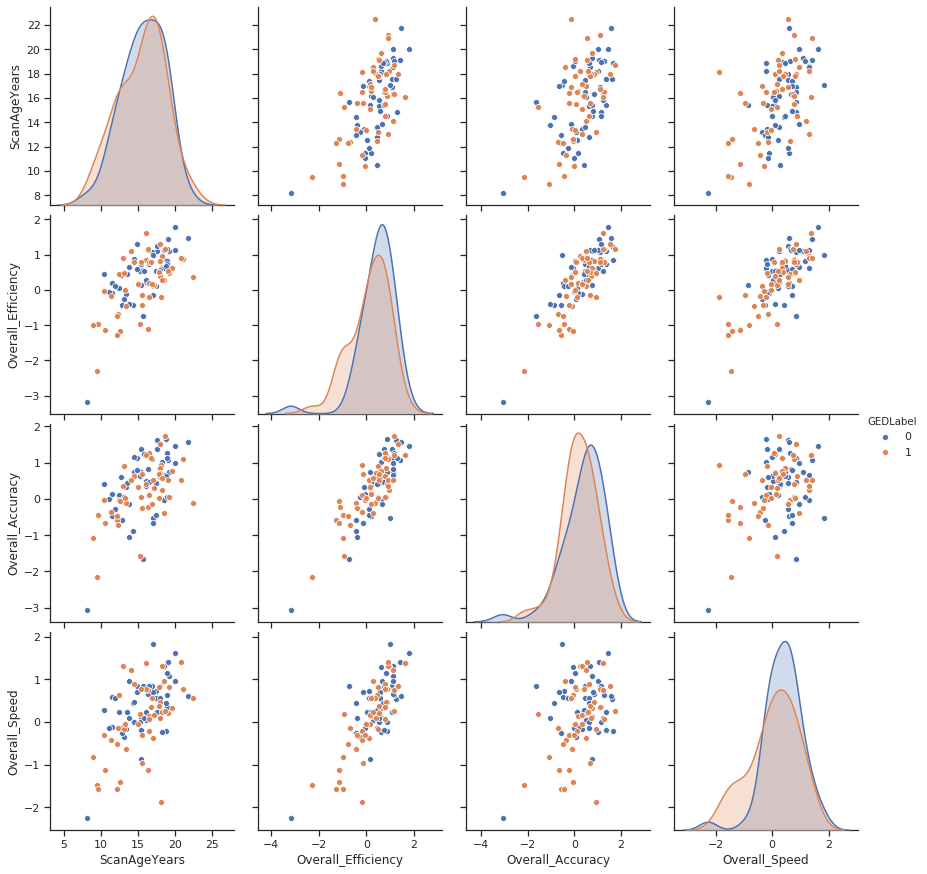

In [50]:
# 'ScanAgeYears', 'Sex', 'Overall_Efficiency', 'Overall_Accuracy', 'Overall_Speed'
columns = ['GEDLabel', 'ScanAgeYears', 'Overall_Efficiency', 'Overall_Accuracy', 'Overall_Speed']
sns.pairplot(df_ged[columns], hue='GEDLabel', height=3, aspect=1)

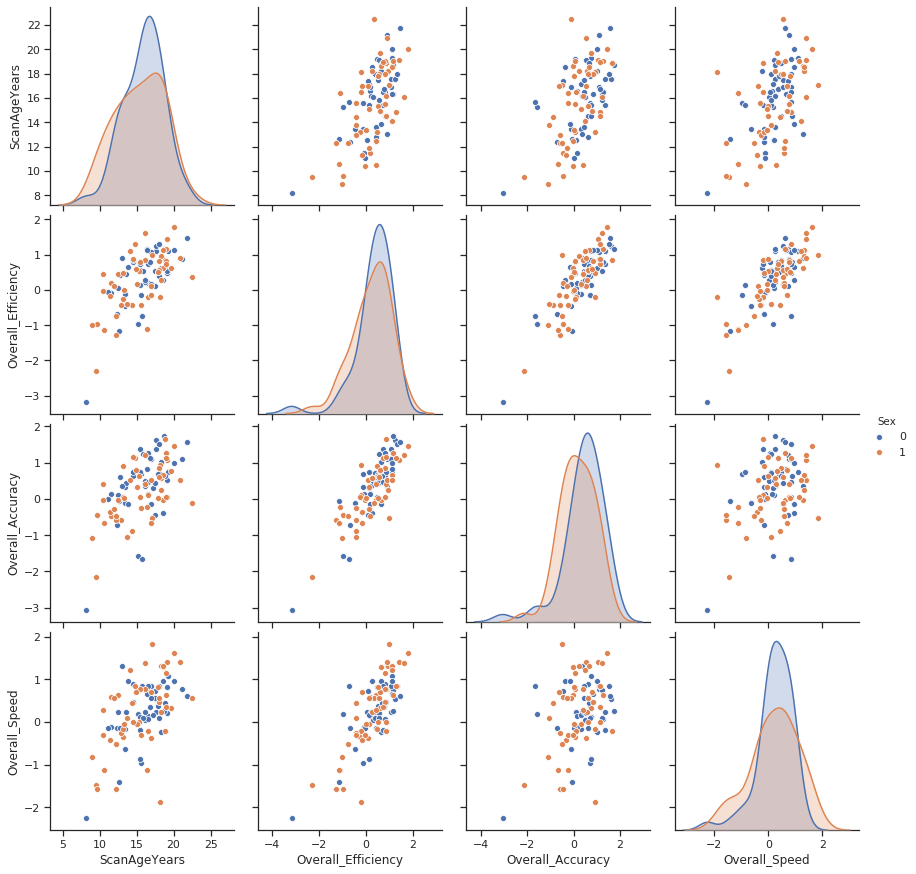

In [51]:
columns = ['Sex', 'ScanAgeYears', 'Overall_Efficiency', 'Overall_Accuracy', 'Overall_Speed']
sns.pairplot(df_ged[columns], hue='Sex', height=3, aspect=1)